In [14]:
import pdb
import numpy as np
import random
import math
import argparse
import tensorflow as tf 
import matplotlib.pyplot as plt

from tensorflow.keras import losses
from tensorflow.keras import models
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import GRU
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LeakyReLU

from shutil import copyfile
import scipy
from sklearn.model_selection import train_test_split

#### Visualization

In [15]:
def plotLoss(history):
    
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

def plotSinData(a, b, c, d):
    
    x = np.arange(Minimum, Maximum ,0.1)   # start,stop,step
    y = a* np.sin(b*x + c) +d
    plt.plot(x,y, 'y.--', alpha = 0.5)
    
def plotData(X_data, Y_data, data_period, params=None, model=None, title_name=None):
    
    plt.figure(figsize=(20,10))
    
    X_data = np.squeeze(X_data.copy())
    Y_data = np.squeeze(Y_data.copy())
    idx = np.argsort(X_data)
    X_data = X_data[idx]
    Y_data = Y_data[idx]
    
    plotSinData(params['a'], params['b'], params['c'], params['d'])
        
    plt.scatter(X_data, Y_data, color='violet', label="target")
        
    if model is not None:
        plt.scatter(X_data, model.predict(X_data%data_period), color='blue', label="output")
    plt.legend()
    if title_name is not None:
        plt.title(title_name)
    plt.show()

#### Make Data

In [16]:
# Train Y value
def get_Sin_Data(count, a, b, c=0, d=0, y_clip=None):
    
    #X_data = 2 * np.pi / b * cycle / count * np.arange(base, count)
    X_data = np.sort(np.random.uniform(Minimum, Maximum, size=(count,1)))
    Y_data = a * np.sin(b*X_data + c) + d
    
    if y_clip != None:
        idx = np.where(y_clip[0] <= y and y<=y_clip[1])
        X_data = X_data[idx]
        Y_data = Y_data[idx]
        
    return X_data, Y_data

[0 3 4]


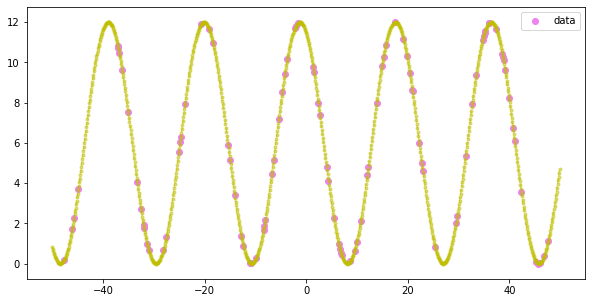

Answer  [18.84955592]


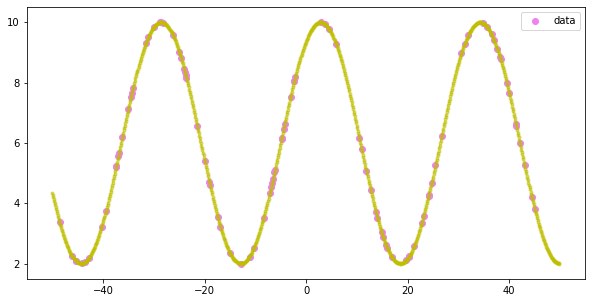

Answer  [31.41592654]


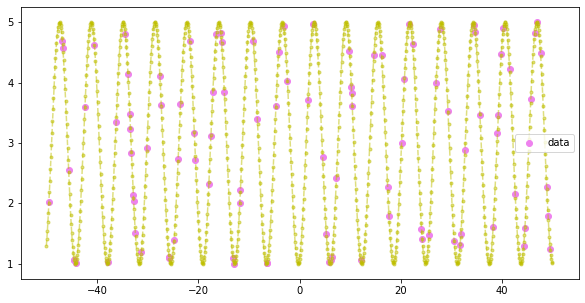

Answer  [6.28318531]


In [24]:
#test
x, y, p, params = get_Sin_Seq_Data(timestep=100, count=5)
plotSeqData(x, y, p, params=params)

#### Model

In [17]:
def buildFCModel(input_shape,
                 hidden_layers=4,
                 hidden_neurons=128,
                 lr=0.0001):
    
    model = tf.keras.Sequential()
    model.add(Dense(hidden_neurons, input_shape=input_shape))
    model.add(LeakyReLU(alpha=0.03))
    
    for _ in range(hidden_layers):
        model.add(Dense(hidden_neurons))
        model.add(LeakyReLU(alpha=0.03))
    
    model.add(Dense(1))

    model.compile(loss='mse', optimizer=Adam(lr=lr))
    model.summary()
    
    board = TensorBoard(log_dir='model', histogram_freq=1, write_graph=True, write_images=False)
    board.set_model(model)
    
    return model, board

In [18]:
def Get_Result_From_FC(X_data, Y_data, data_period, params, batch_size=50, epochs=100, mode="Train"):
    model = None
    
    if mode == "Train":
        X_train,X_test,Y_train,Y_test=train_test_split(X_data, Y_data, test_size=0.2)
        model, board = buildFCModel(input_shape=(1,))
        
        plotData(X_train, Y_train, data_period, params=params, model=model, title_name="Before Training")
        
        history=model.fit(X_train%data_period, Y_train, batch_size=50, epochs=epochs, validation_data=(X_test%data_period,Y_test), verbose=2)
        #callbacks=[board]
    
        plotLoss(history)
        
        plotData(X_train, Y_train, data_period, params=params, model=model, title_name="After Training")
        
    return model

## y = sinx 실험

#### Train Model:
[-50, 50) 범위에서 1000개 데이터를 가지고 실험.

hidden_layers=4, hidden_neurons=128

In [19]:
params={}
params['a'] = 1 ; params['b'] = 1 ; params['c'] = 0 ; params['d'] = 0

Minimum = -50; Maximum = 50

X_data, Y_data = get_Sin_Data(count=1000, a=params['a'], b=params['b'], c=params['c'], d=params['d'],)

Model: "sequential_83"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_774 (Dense)            (None, 128)               256       
_________________________________________________________________
leaky_re_lu_691 (LeakyReLU)  (None, 128)               0         
_________________________________________________________________
dense_775 (Dense)            (None, 128)               16512     
_________________________________________________________________
leaky_re_lu_692 (LeakyReLU)  (None, 128)               0         
_________________________________________________________________
dense_776 (Dense)            (None, 128)               16512     
_________________________________________________________________
leaky_re_lu_693 (LeakyReLU)  (None, 128)               0         
_________________________________________________________________
dense_777 (Dense)            (None, 128)             

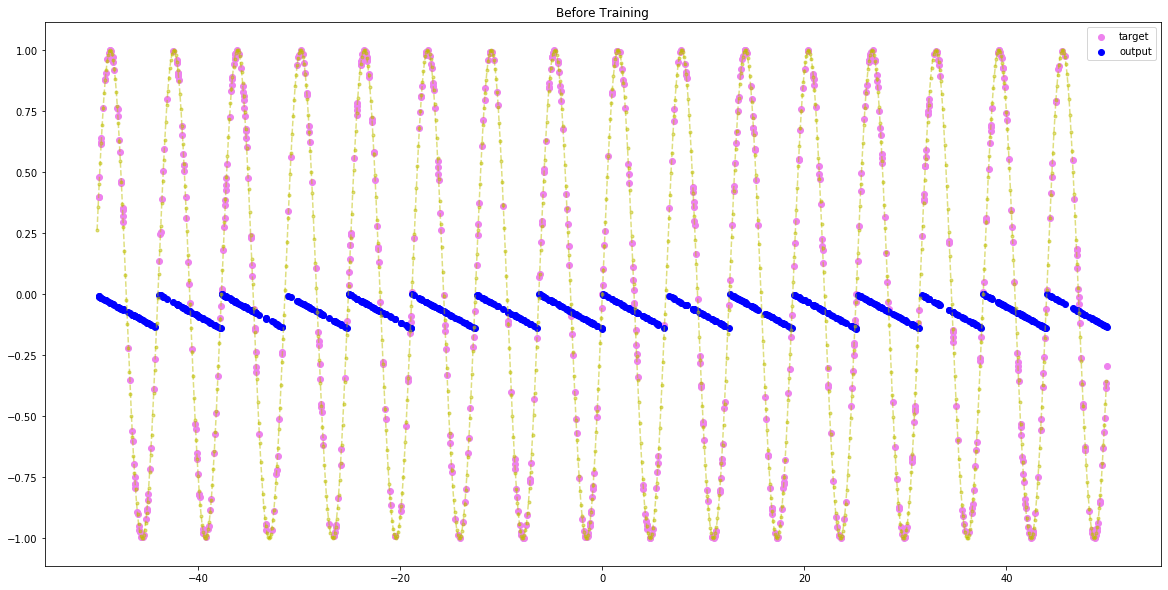

Train on 800 samples, validate on 200 samples
Epoch 1/100
800/800 - 0s - loss: 0.4393 - val_loss: 0.4354
Epoch 2/100
800/800 - 0s - loss: 0.4171 - val_loss: 0.4159
Epoch 3/100
800/800 - 0s - loss: 0.3961 - val_loss: 0.3883
Epoch 4/100
800/800 - 0s - loss: 0.3667 - val_loss: 0.3543
Epoch 5/100
800/800 - 0s - loss: 0.3292 - val_loss: 0.3177
Epoch 6/100
800/800 - 0s - loss: 0.2915 - val_loss: 0.2749
Epoch 7/100
800/800 - 0s - loss: 0.2546 - val_loss: 0.2314
Epoch 8/100
800/800 - 0s - loss: 0.2090 - val_loss: 0.1901
Epoch 9/100
800/800 - 0s - loss: 0.1664 - val_loss: 0.1443
Epoch 10/100
800/800 - 0s - loss: 0.1313 - val_loss: 0.1194
Epoch 11/100
800/800 - 0s - loss: 0.1125 - val_loss: 0.1023
Epoch 12/100
800/800 - 0s - loss: 0.1004 - val_loss: 0.0965
Epoch 13/100
800/800 - 0s - loss: 0.0959 - val_loss: 0.0958
Epoch 14/100
800/800 - 0s - loss: 0.0912 - val_loss: 0.0867
Epoch 15/100
800/800 - 0s - loss: 0.0846 - val_loss: 0.0849
Epoch 16/100
800/800 - 0s - loss: 0.0832 - val_loss: 0.0810
Epo

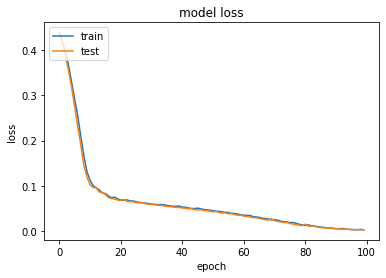

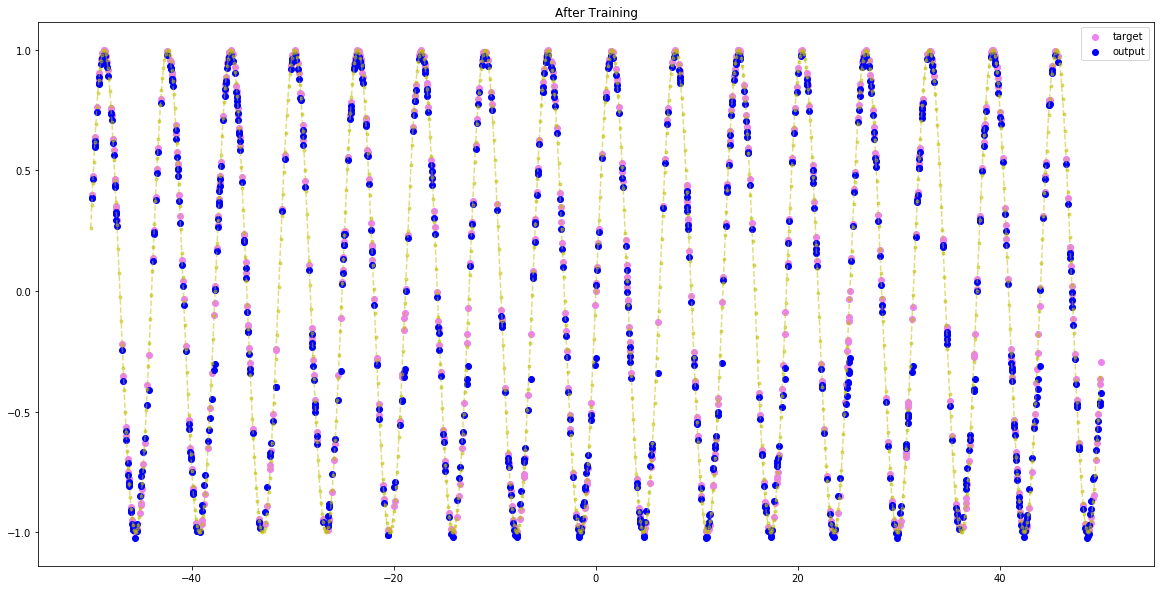

In [20]:
FC_model = Get_Result_From_FC(X_data, Y_data, data_period=2*math.pi, params=params, mode="Train")

In [63]:
model_json = FC_model.to_json()
with open("./model/MLP1.json", "w") as json_file : 
    json_file.write(model_json)
FC_model.save_weights("./model/MLP1.h5")
print("Saved model MLP1 to disk")

Saved model MLP1 to disk


#### Test Model: [-500, 500) 범위에서 100개 데이터를 뽑아서 테스트

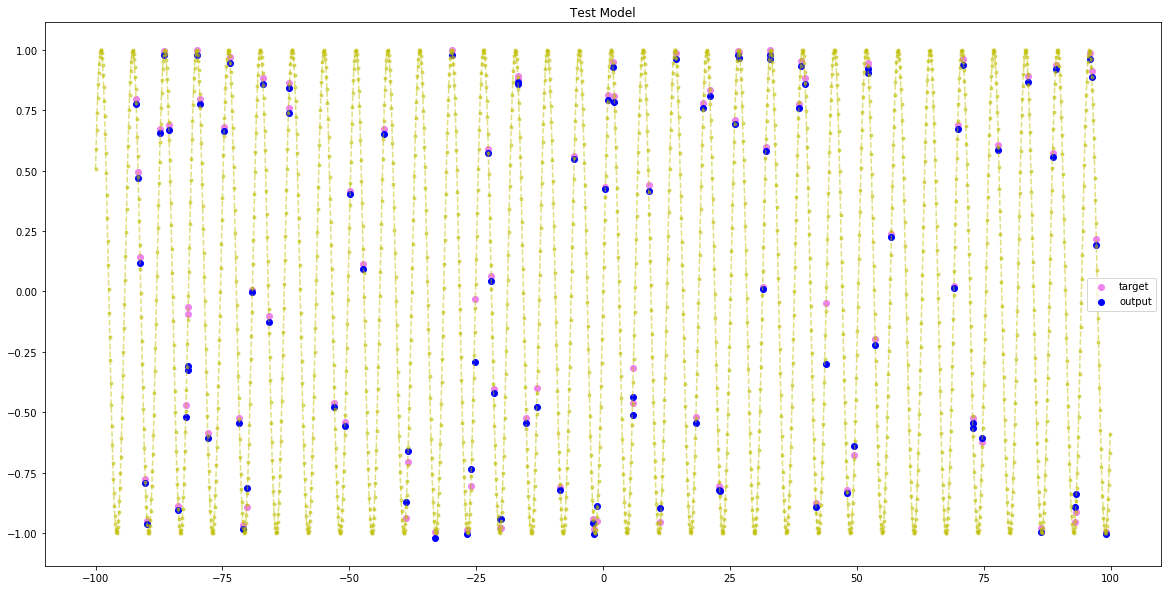

In [21]:
params={}
params['a'] = 1 ; params['b'] = 1 ; params['c'] = 0 ; params['d'] = 0

Minimum = -100; Maximum = 100

X_Testdata, Y_Testdata = get_Sin_Data(count=100, a=params['a'], b=params['b'], c=params['c'], d=params['d'])
plotData(X_Testdata, Y_Testdata, data_period = math.pi * 2 ,params=params, model=FC_model, title_name="Test Model")

## Architecture Search

랜덤하게 a, b, c, d를 골라서 y = asin(bx + c) +d 데이터를 만들고,
이를 여러 구조에 대해서 실험해보기

In [84]:
hidden_layers = [2, 4, 8, 16]
hidden_neurons = [32, 64, 128, 256]

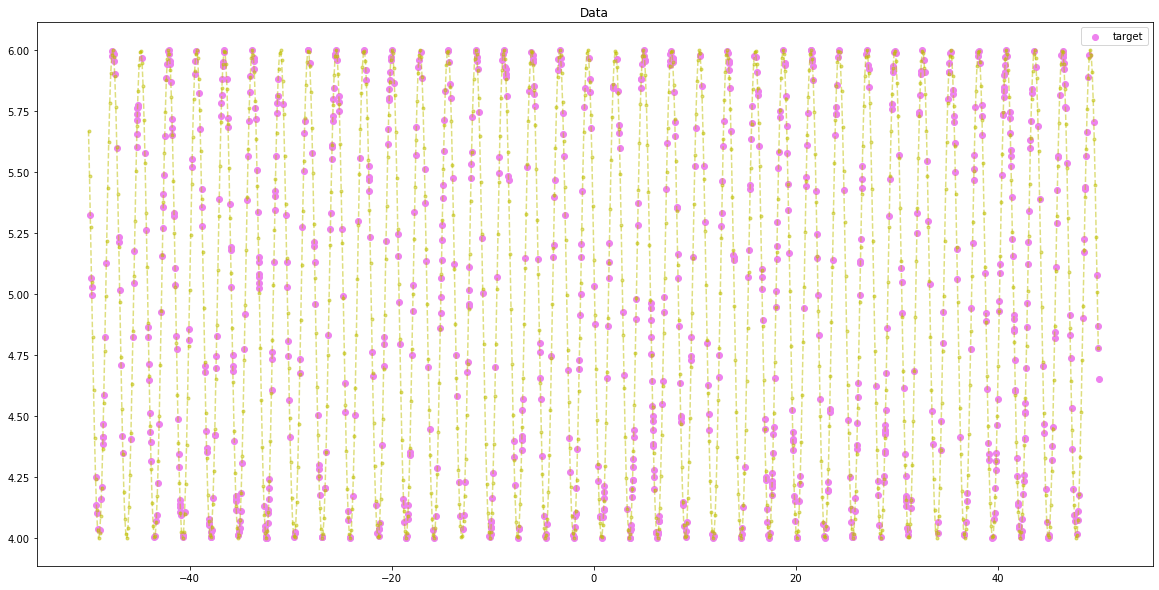

Model: "sequential_84"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_780 (Dense)            (None, 32)                64        
_________________________________________________________________
leaky_re_lu_696 (LeakyReLU)  (None, 32)                0         
_________________________________________________________________
dense_781 (Dense)            (None, 32)                1056      
_________________________________________________________________
leaky_re_lu_697 (LeakyReLU)  (None, 32)                0         
_________________________________________________________________
dense_782 (Dense)            (None, 32)                1056      
_________________________________________________________________
leaky_re_lu_698 (LeakyReLU)  (None, 32)                0         
_________________________________________________________________
dense_783 (Dense)            (None, 1)               

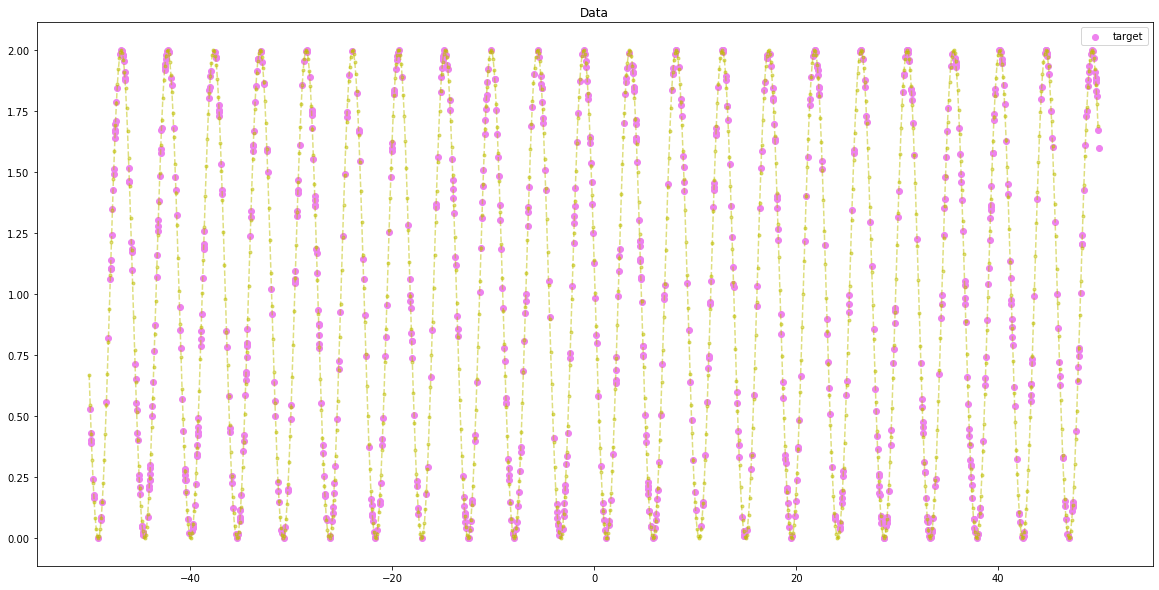

Model: "sequential_100"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_932 (Dense)            (None, 32)                64        
_________________________________________________________________
leaky_re_lu_832 (LeakyReLU)  (None, 32)                0         
_________________________________________________________________
dense_933 (Dense)            (None, 32)                1056      
_________________________________________________________________
leaky_re_lu_833 (LeakyReLU)  (None, 32)                0         
_________________________________________________________________
dense_934 (Dense)            (None, 32)                1056      
_________________________________________________________________
leaky_re_lu_834 (LeakyReLU)  (None, 32)                0         
_________________________________________________________________
dense_935 (Dense)            (None, 1)              

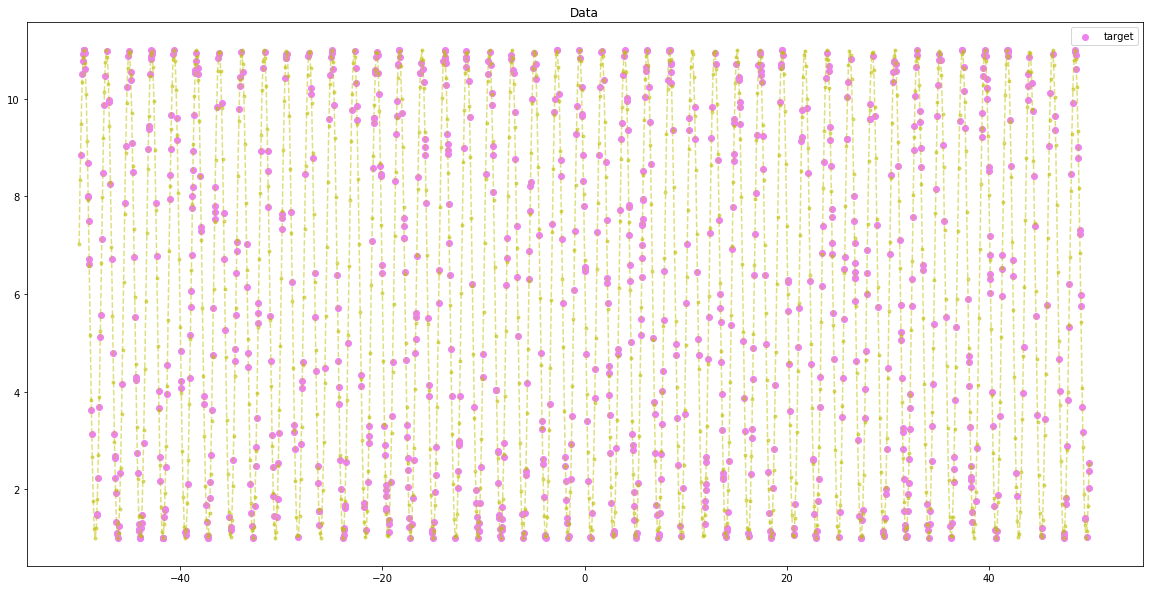

Model: "sequential_116"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1084 (Dense)           (None, 32)                64        
_________________________________________________________________
leaky_re_lu_968 (LeakyReLU)  (None, 32)                0         
_________________________________________________________________
dense_1085 (Dense)           (None, 32)                1056      
_________________________________________________________________
leaky_re_lu_969 (LeakyReLU)  (None, 32)                0         
_________________________________________________________________
dense_1086 (Dense)           (None, 32)                1056      
_________________________________________________________________
leaky_re_lu_970 (LeakyReLU)  (None, 32)                0         
_________________________________________________________________
dense_1087 (Dense)           (None, 1)              

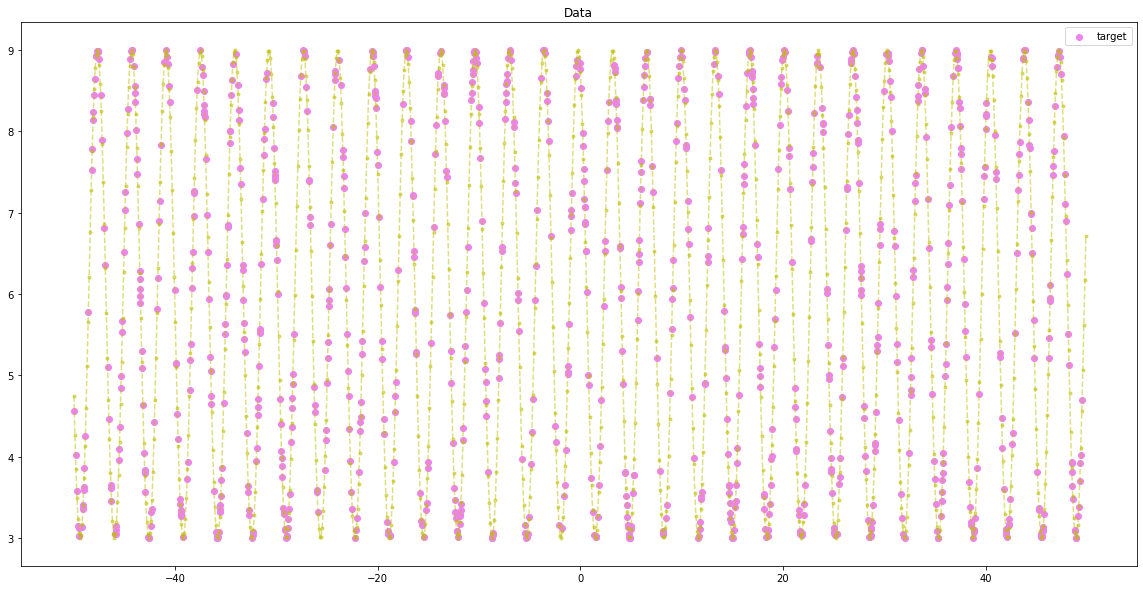

Model: "sequential_132"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1236 (Dense)           (None, 32)                64        
_________________________________________________________________
leaky_re_lu_1104 (LeakyReLU) (None, 32)                0         
_________________________________________________________________
dense_1237 (Dense)           (None, 32)                1056      
_________________________________________________________________
leaky_re_lu_1105 (LeakyReLU) (None, 32)                0         
_________________________________________________________________
dense_1238 (Dense)           (None, 32)                1056      
_________________________________________________________________
leaky_re_lu_1106 (LeakyReLU) (None, 32)                0         
_________________________________________________________________
dense_1239 (Dense)           (None, 1)              

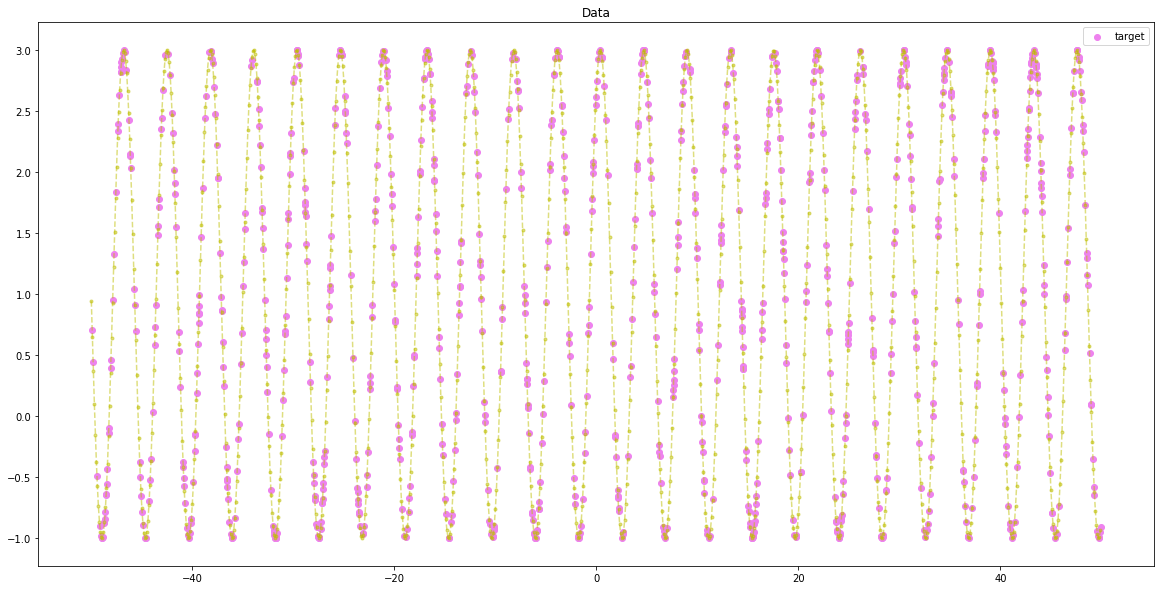

Model: "sequential_148"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1388 (Dense)           (None, 32)                64        
_________________________________________________________________
leaky_re_lu_1240 (LeakyReLU) (None, 32)                0         
_________________________________________________________________
dense_1389 (Dense)           (None, 32)                1056      
_________________________________________________________________
leaky_re_lu_1241 (LeakyReLU) (None, 32)                0         
_________________________________________________________________
dense_1390 (Dense)           (None, 32)                1056      
_________________________________________________________________
leaky_re_lu_1242 (LeakyReLU) (None, 32)                0         
_________________________________________________________________
dense_1391 (Dense)           (None, 1)              

In [23]:
import csv
with open('MLP_Architecture_Search.csv','w', newline='') as f:
    wr = csv.writer(f)
    wr.writerow(['experiment number', 'a', 'b', 'c', 'd', '# hidden layers', '# hidden neurons', 'loss', '# parameters'])
    
    for i in range(5):
        params = {}
        a = random.randint(1,6) ; b = random.uniform(0.12, 3)
        c = random.randint(1,6) ; d = random.randint(1,6)
        params['a'] = a ; params['b'] = b ; params['c'] = c ; params['d'] = d
        period = math.pi * 2 / params['b']

        Maximum= 50; Minimum = -50

        X_data, Y_data = get_Sin_Data(count=1000, a=params['a'], b=params['b'], c=params['c'], d=params['d'])
        plotData(X_data, Y_data, period, params=params, model=None, title_name="Data")

        X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.2)

        for l in hidden_layers:
            for n in hidden_neurons:
                name = "hidden_layer_" + str(l)+"_hidden_neurons_"+str(n)
                model, _ = buildFCModel(input_shape=(1,), hidden_layers=l, hidden_neurons=n)
                history = model.fit(X_train % period, Y_train, batch_size=50, epochs=100, validation_data=(X_test % period,Y_test), verbose=0)
                acc = history.history['val_loss'][-1]
                parameters = model.count_params()
                
                wr.writerow([i, a, b, c, d, l, n, acc, parameters])

### Visualize Result

In [24]:
import pandas as pd
result = pd.read_csv('./MLP_Architecture_Search.csv')
print(result)

    experiment number  a         b  c  d  # hidden layers  # hidden neurons  \
0                   0  1  2.273747  3  5                2                32   
1                   0  1  2.273747  3  5                2                64   
2                   0  1  2.273747  3  5                2               128   
3                   0  1  2.273747  3  5                2               256   
4                   0  1  2.273747  3  5                4                32   
5                   0  1  2.273747  3  5                4                64   
6                   0  1  2.273747  3  5                4               128   
7                   0  1  2.273747  3  5                4               256   
8                   0  1  2.273747  3  5                8                32   
9                   0  1  2.273747  3  5                8                64   
10                  0  1  2.273747  3  5                8               128   
11                  0  1  2.273747  3  5            

In [116]:
loss_result = result['loss'].groupby([result['# hidden layers'], result['# hidden neurons']]).mean()
loss_result = loss_result.unstack()
print(loss_result)

# hidden neurons       32        64        128       256
# hidden layers                                         
2                 2.008213  1.400762  0.952812  0.518013
4                 1.229152  0.635011  0.322712  0.213755
8                 0.641195  0.456603  0.020247  0.007333
16                0.386669  0.033555  0.009854  0.004326


In [117]:
parameters_result = result['# parameters'].groupby([result['# hidden layers'], result['# hidden neurons']]).mean()
parameters_result = parameters_result.unstack()
print(parameters_result)

# hidden neurons    32     64      128      256
# hidden layers                                
2                  2209   8513   33409   132353
4                  4321  16833   66433   263937
8                  8545  33473  132481   527105
16                16993  66753  264577  1053441


In [118]:
loss_result.to_csv('loss_result1.csv', encoding='utf-8', index=True)
loss_result = pd.read_csv('loss_result1.csv')

parameters_result.to_csv('parameters_result1.csv', encoding='utf-8', index=True)
parameters_result = pd.read_csv('parameters_result1.csv')

In [119]:
print(loss_result)
print(parameters_result)

   # hidden layers        32        64       128       256
0                2  2.008213  1.400762  0.952812  0.518013
1                4  1.229152  0.635011  0.322712  0.213755
2                8  0.641195  0.456603  0.020247  0.007333
3               16  0.386669  0.033555  0.009854  0.004326
   # hidden layers     32     64     128      256
0                2   2209   8513   33409   132353
1                4   4321  16833   66433   263937
2                8   8545  33473  132481   527105
3               16  16993  66753  264577  1053441


In [120]:
print(parameters_result.loc[0][2])

8513


#### hidden neuron 증가에 따른 변화

In [121]:
plt.rcParams.update({'font.size': 22})

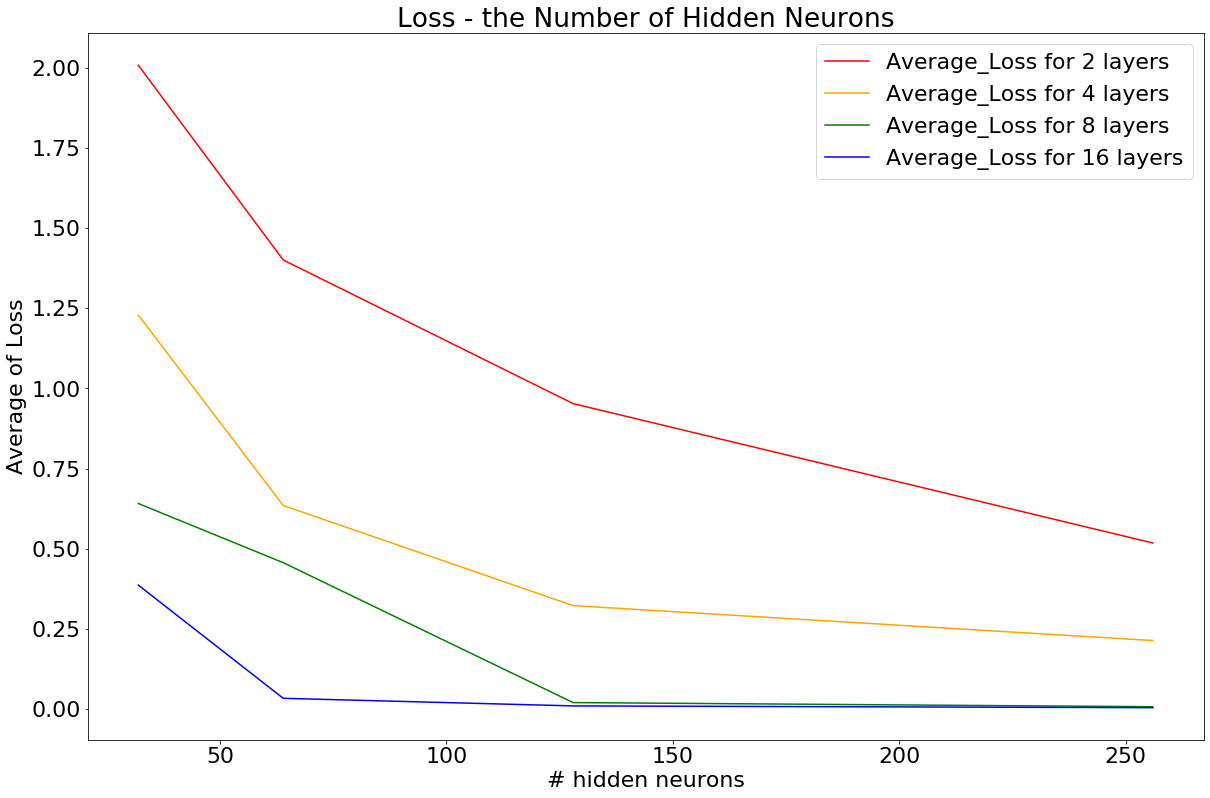

In [122]:
plt.figure(figsize=(20, 13))

loss = {}
color = ['red', 'orange', 'green', 'blue']

for l in range(len(hidden_layers)):
    name = str(hidden_layers[l])+'_layers'
    loss_data = []
    
    for n in range(len(hidden_neurons)):
        loss_data.append(loss_result.loc[l][n+1])
        
    loss[name] = loss_data
    
    plt.plot(hidden_neurons, loss_data, color=color[l], label="Average_Loss for " + str(hidden_layers[l]) + " layers")
    plt.xlabel("# hidden neurons")
    plt.ylabel("Average of Loss")
    
plt.legend()
plt.title("Loss - the Number of Hidden Neurons" )
    
plt.show()
plt.close()

### layer 증가에 따른 변화

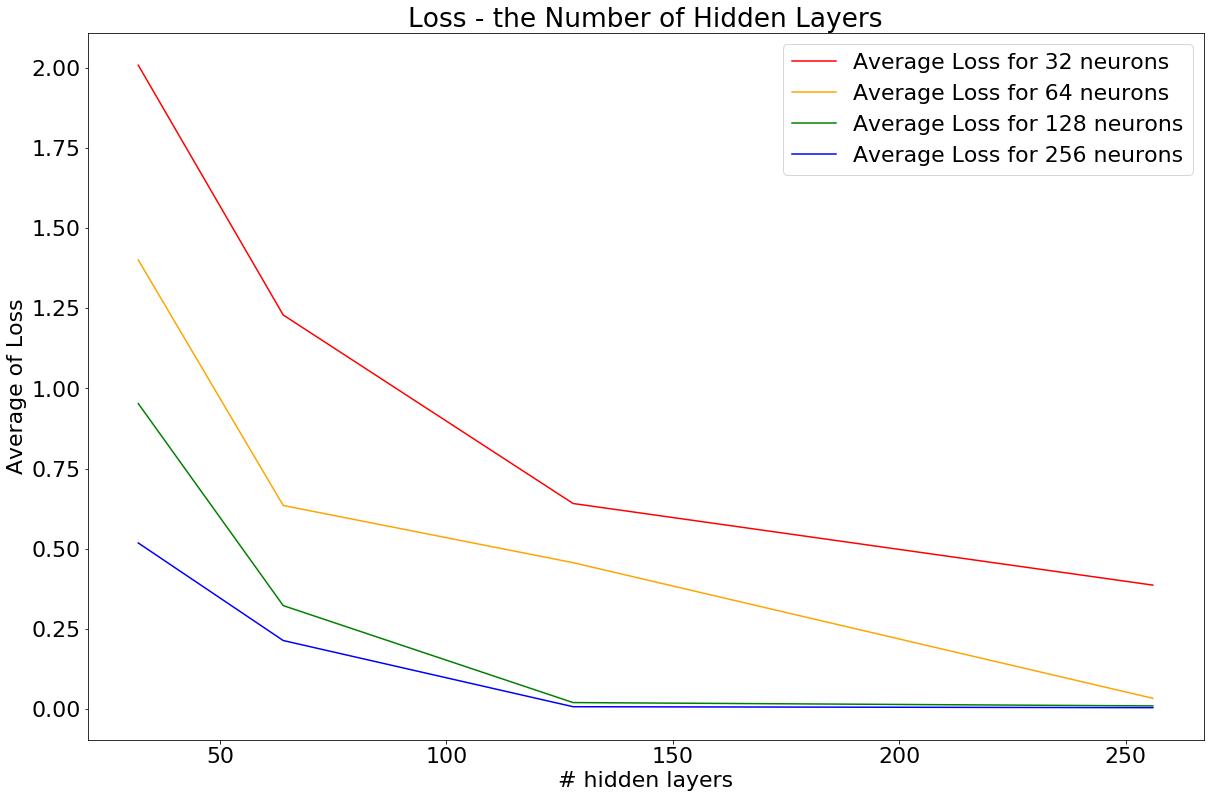

In [123]:
total_loss_params = {}

plt.figure(figsize=(20, 13))

loss = {}
color = ['red', 'orange', 'green', 'blue']

for n in range(len(hidden_neurons)):
    loss_data = []
    
    for l in range(len(hidden_layers)):
        name = '( ' + str(hidden_layers[l]) + ', ' + str(hidden_neurons[n]) + ' )'
        loss_data.append(loss_result.loc[l][n+1])
        total_loss_params[name] = (loss_result.loc[l][n+1], parameters_result.loc[l][n+1])
        
    loss[name] = loss_data
    
    plt.plot(hidden_neurons, loss_data, color=color[n], label="Average Loss for " + str(hidden_neurons[n]) + " neurons")
    plt.xlabel("# hidden layers")
    plt.ylabel("Average of Loss")
    
plt.legend()
plt.title("Loss - the Number of Hidden Layers" )
    
plt.show()
plt.close()

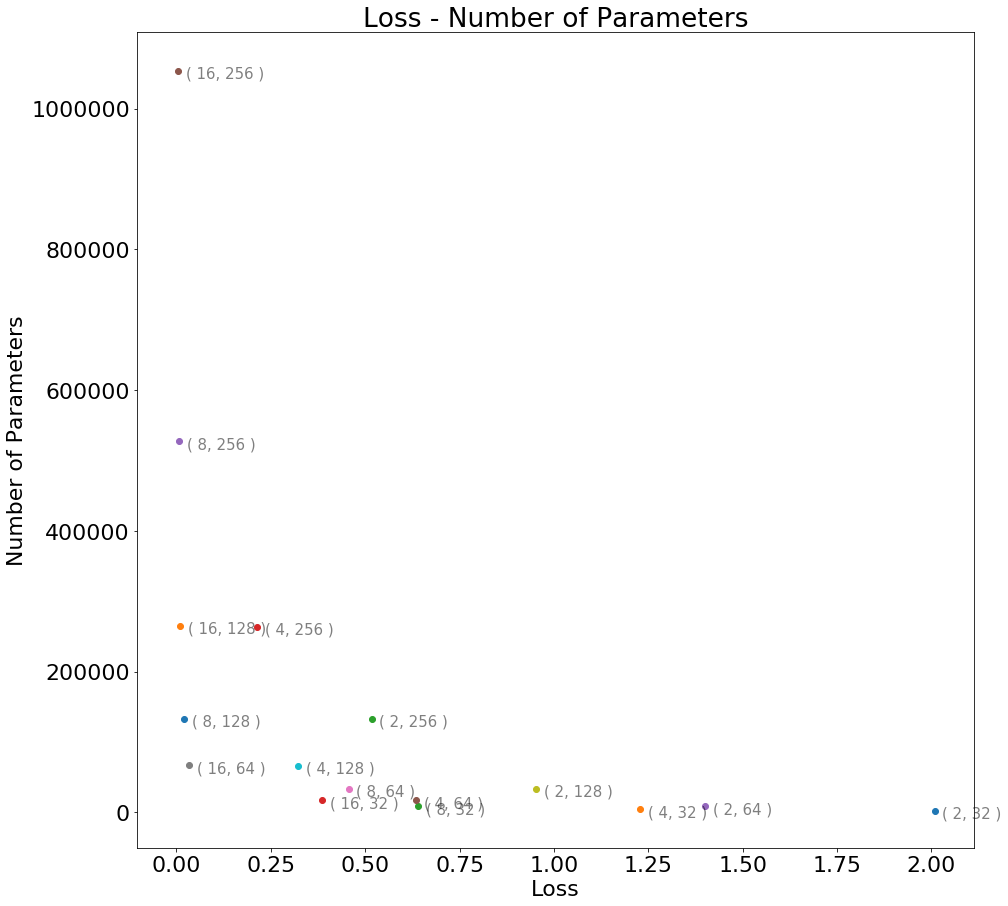

In [124]:
plt.figure(figsize=(15, 15))
for key in total_loss_params.keys():
    plt.scatter(total_loss_params[key][0],total_loss_params[key][1], label=key)
    plt.text(total_loss_params[key][0]+0.02, (total_loss_params[key][1]-10000), s=key, fontsize=15, alpha=0.5)
plt.ylabel("Number of Parameters")
plt.xlabel("Loss")
plt.title("Loss - Number of Parameters")
plt.show()
plt.close()